Use pandas, numpy and matplotlib,seaborn
1. Use movies11.csv,movie12.csv,movie13.csv and rating11.csv file and solve following
2. find all masala movie - (action ,romance,comedy,thriller)
3. plot a pie chart to represent genre and frequency of movie count
4. average rating for each movie and merge 2 frames
5. draw pie chart for each genre and average rating
6. draw bar graph for each rating and number of movies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv("movies11.csv")
df2 = pd.read_csv("movie12.csv",header=None)
df3 = pd.read_csv("movies13.csv",header=None)
rating = pd.read_csv("rating11.csv")
df2.columns=df1.columns
df3.columns=df1.columns

movies=pd.concat([df1,df2,df3],ignore_index=True)

**1. find all masala movie - (action ,romance,comedy,thriller)**:



In [ ]:
masala_genre=['Action','Romance','Comedy','Thriller']
filter=movies[movies['genres'].apply(lambda x: all(genres in x.split('|') for genres in masala_genre))]
filter

,movieId,title,genres
351,380,True Lies (1994),Action|Adventure|Comedy|Romance|Thriller
2358,2468,Jumpin' Jack Flash (1986),Action|Comedy|Romance|Thriller
4599,4719,Osmosis Jones (2001),Action|Animation|Comedy|Crime|Drama|Romance|Th...
4835,4956,"Stunt Man, The (1980)",Action|Adventure|Comedy|Drama|Romance|Thriller
6429,6564,Lara Croft Tomb Raider: The Cradle of Life (2003),Action|Adventure|Comedy|Romance|Thriller
6579,6714,So Close (Chik Yeung Tin Sai) (2002),Action|Comedy|Romance|Thriller
9666,31367,"Chase, The (1994)",Action|Adventure|Comedy|Crime|Romance|Thriller
10265,34435,Sholay (1975),Action|Adventure|Comedy|Musical|Romance|Thriller


 **2.plot a pie chart to represent genre and frequency of movie count**

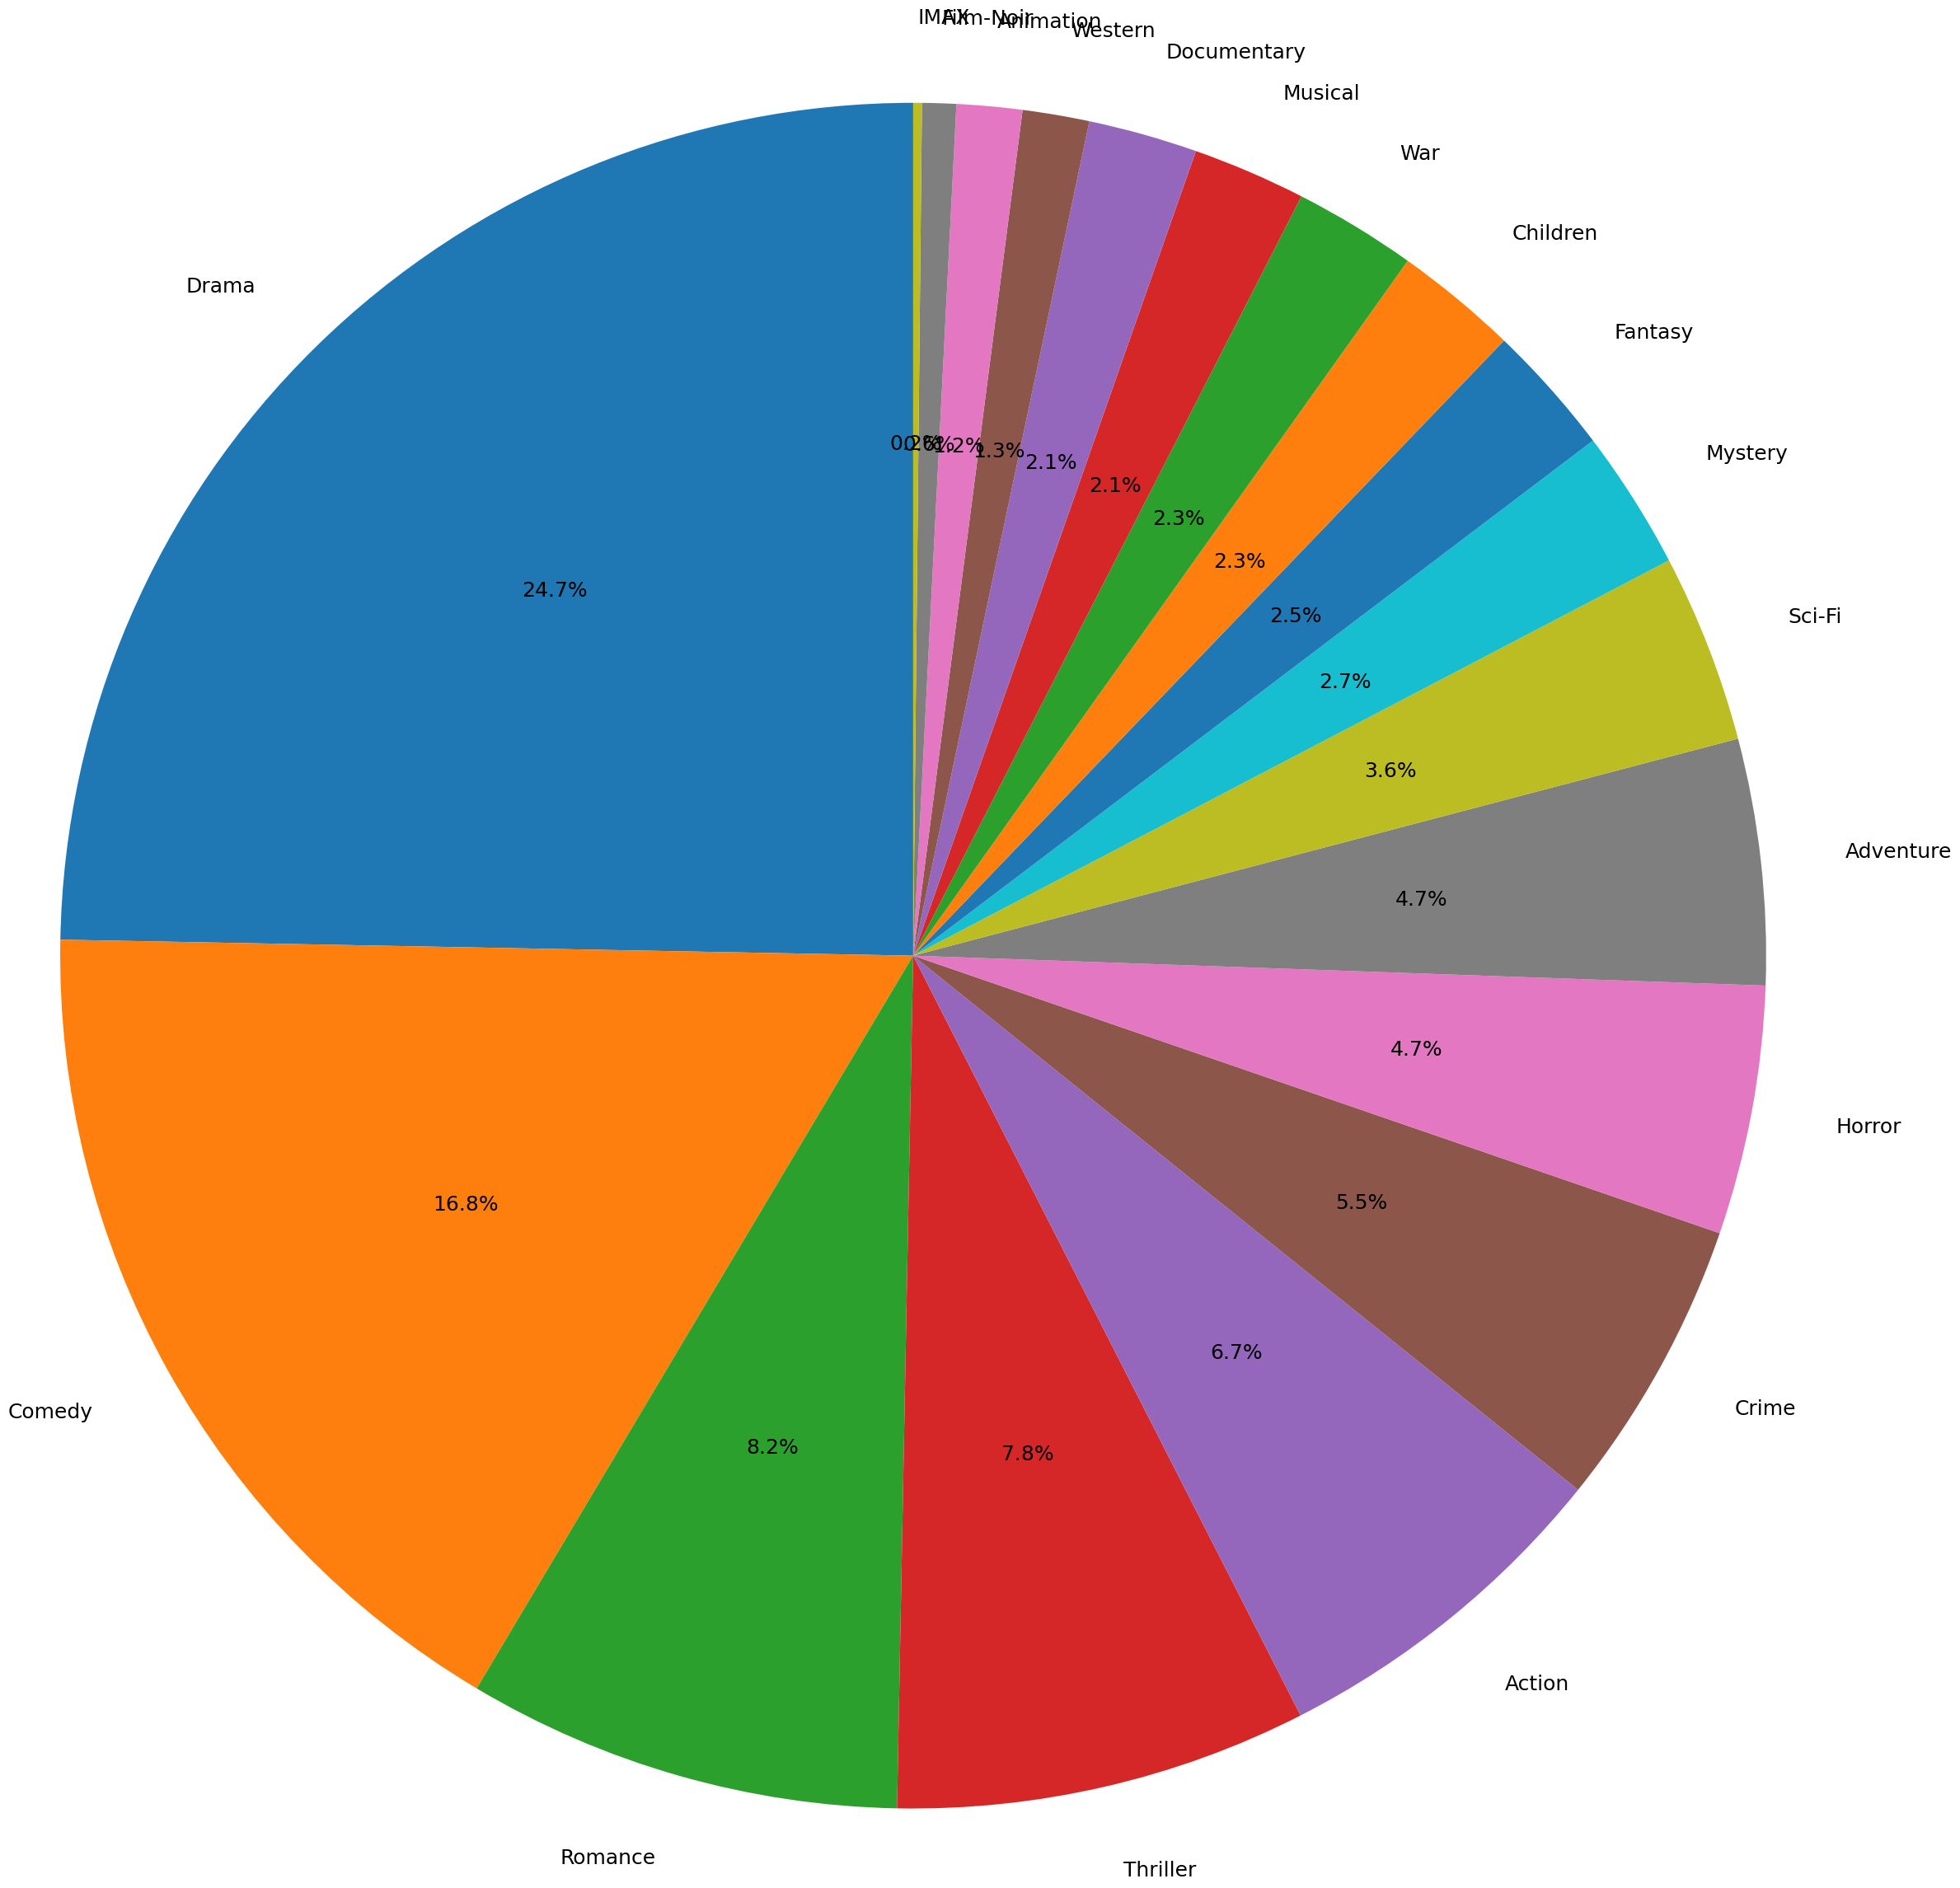

In [ ]:
genre_counts = movies['genres'].str.split('|').explode().value_counts()
label_props = {'fontsize': 18}
plt.pie(genre_counts,labels=genre_counts.index,startangle=90,autopct='%.1f%%',textprops=label_props,radius =7)
plt.show()

**3.average rating for each movie and merge 2 frames**

In [ ]:
average_ratings = rating.groupby('movieId')['rating'].mean().reset_index()
merged_df = movies.merge(average_ratings, on='movieId')

4.draw pie chart for each genre and average **rating**

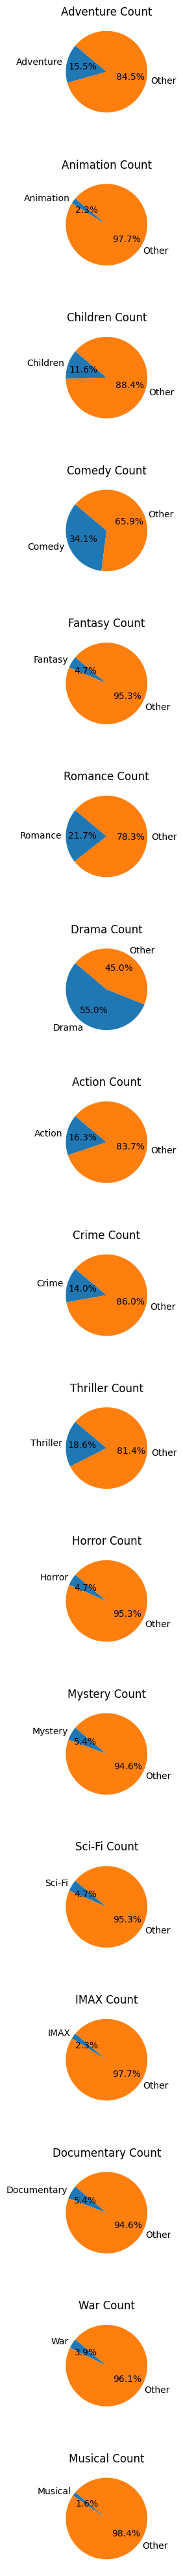

In [62]:
unique_genres = merged_df['genres'].str.split('|').explode().unique()
fig, axes = plt.subplots(len(unique_genres), 1, figsize=(6, 3 * len(unique_genres)))
plt.subplots_adjust(hspace=0.5)

for i, genre in enumerate(unique_genres):
    # Filter data for the current genre
    genre_data = merged_df[merged_df['genres'].str.contains(genre)]

    # Calculate genre counts
    genre_counts = len(genre_data)

    # Create a pie chart for genre counts
    axes[i].pie([genre_counts, len(merged_df) - genre_counts], labels=[genre, 'Other'], autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'{genre} Count')

# Show the plots
plt.show()

**4.draw bar graph for each rating and number of movies**

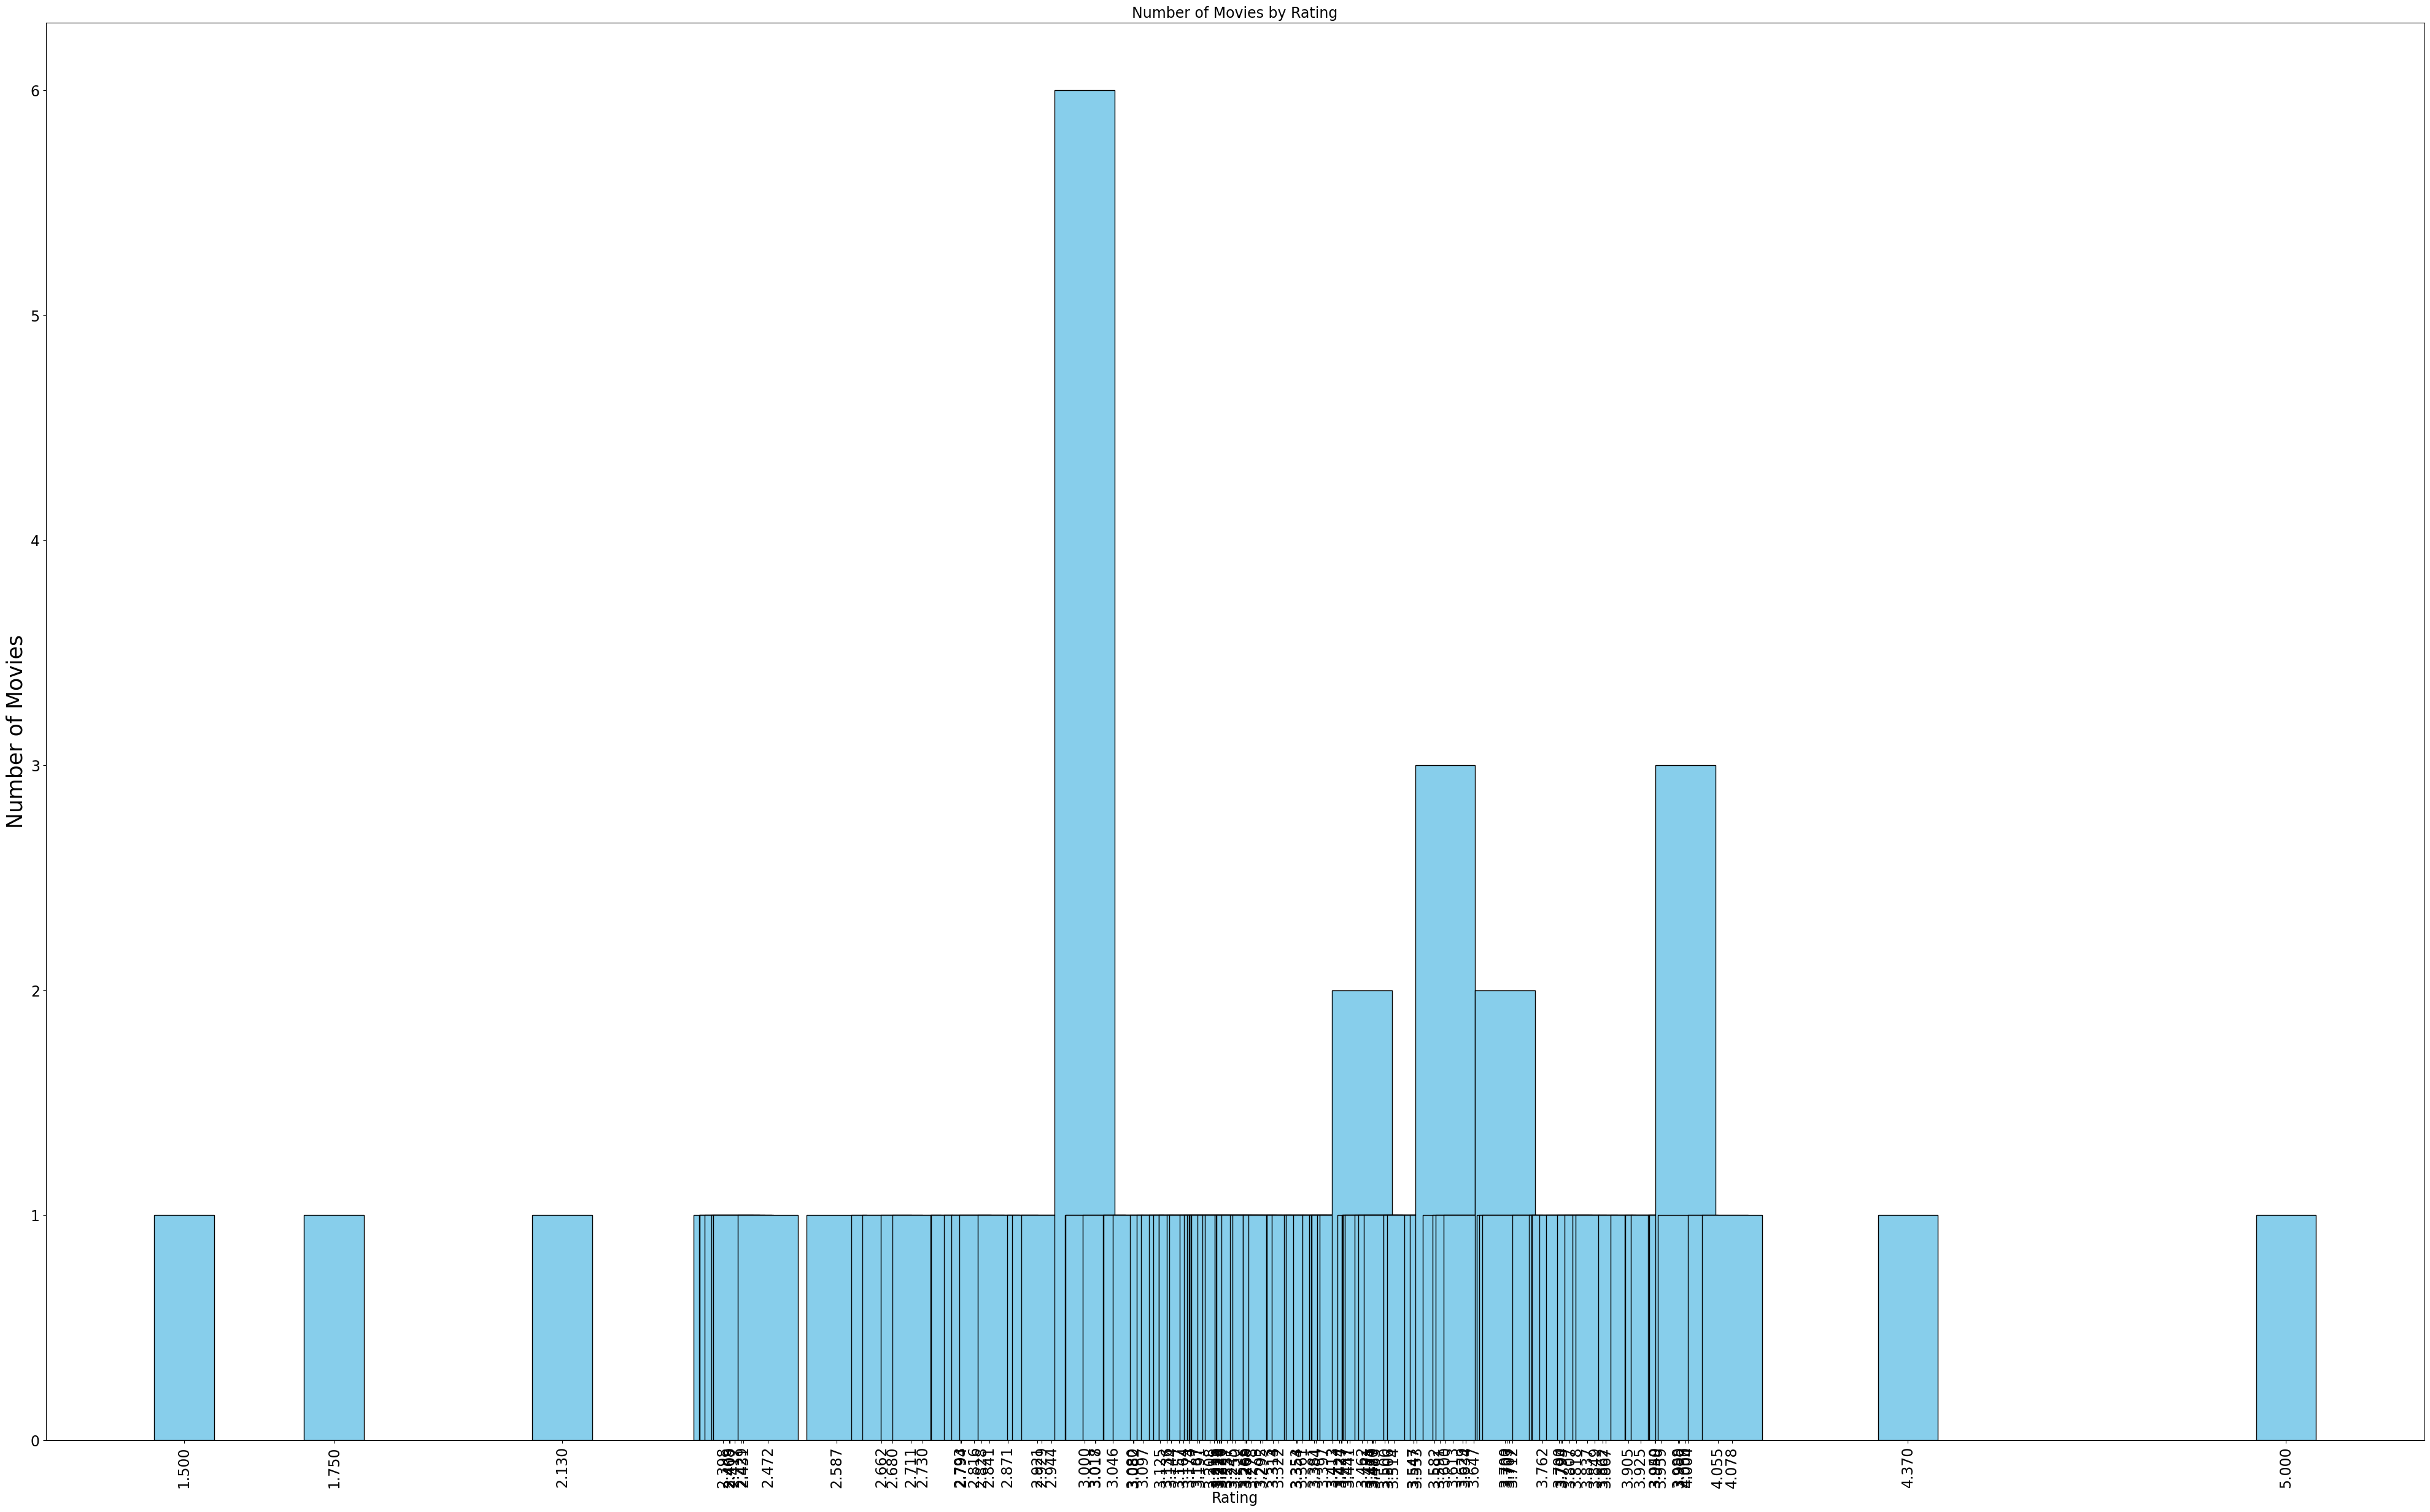

In [77]:
rating_counts = merged_df['rating'].value_counts().sort_index()

# Create a bar graph
plt.figure(figsize=(50, 30))
plt.bar(rating_counts.index, rating_counts.values, color='skyblue',width = 0.1,edgecolor = "black")
plt.xlabel('Rating',fontsize = 17)
plt.ylabel('Number of Movies',fontsize = 25)
plt.title('Number of Movies by Rating',fontsize = 17)
plt.xticks(rating_counts.index,fontsize = 17,rotation = 90)
plt.yticks(fontsize = 17)

# Show the plot
plt.show()




